In [ ]:
pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=71bb3582fed258e5b31ee759e9ffc2db874a18fb8773358baf77299cef2060e3
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [ ]:
#create a pyspark session

from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()

In [ ]:
#data import

df=spark.read.csv('/content/sample_data/california_housing_train.csv', header=True)
df.show()

+-----------+---------+------------------+-----------+--------------+-----------+-----------+-------------+------------------+
|  longitude| latitude|housing_median_age|total_rooms|total_bedrooms| population| households|median_income|median_house_value|
+-----------+---------+------------------+-----------+--------------+-----------+-----------+-------------+------------------+
|-114.310000|34.190000|         15.000000|5612.000000|   1283.000000|1015.000000| 472.000000|     1.493600|      66900.000000|
|-114.470000|34.400000|         19.000000|7650.000000|   1901.000000|1129.000000| 463.000000|     1.820000|      80100.000000|
|-114.560000|33.690000|         17.000000| 720.000000|    174.000000| 333.000000| 117.000000|     1.650900|      85700.000000|
|-114.570000|33.640000|         14.000000|1501.000000|    337.000000| 515.000000| 226.000000|     3.191700|      73400.000000|
|-114.570000|33.570000|         20.000000|1454.000000|    326.000000| 624.000000| 262.000000|     1.925000|    

In [ ]:
#create a temporary sql view

df.createOrReplaceTempView('housing')

In [ ]:
# how to query data
# option 1
# query = """"
# type in your query
# """
# spark.sql(query).show()
# option 2
# spark.sql("type sql query inside the code").show()

In [ ]:
# option 2

spark.sql("select * from housing limit 3").show()

+-----------+---------+------------------+-----------+--------------+-----------+----------+-------------+------------------+
|  longitude| latitude|housing_median_age|total_rooms|total_bedrooms| population|households|median_income|median_house_value|
+-----------+---------+------------------+-----------+--------------+-----------+----------+-------------+------------------+
|-114.310000|34.190000|         15.000000|5612.000000|   1283.000000|1015.000000|472.000000|     1.493600|      66900.000000|
|-114.470000|34.400000|         19.000000|7650.000000|   1901.000000|1129.000000|463.000000|     1.820000|      80100.000000|
|-114.560000|33.690000|         17.000000| 720.000000|    174.000000| 333.000000|117.000000|     1.650900|      85700.000000|
+-----------+---------+------------------+-----------+--------------+-----------+----------+-------------+------------------+



In [ ]:
# Option 1

query = """
SELECT total_rooms + total_bedrooms as total_rooms_bedrooms,
population,
population/households as population_per_household,
median_income,
median_house_value
FROM housing
"""

spark.sql(query).show()

+--------------------+-----------+------------------------+-------------+------------------+
|total_rooms_bedrooms| population|population_per_household|median_income|median_house_value|
+--------------------+-----------+------------------------+-------------+------------------+
|              6895.0|1015.000000|      2.1504237288135593|     1.493600|      66900.000000|
|              9551.0|1129.000000|      2.4384449244060473|     1.820000|      80100.000000|
|               894.0| 333.000000|      2.8461538461538463|     1.650900|      85700.000000|
|              1838.0| 515.000000|      2.2787610619469025|     3.191700|      73400.000000|
|              1780.0| 624.000000|       2.381679389312977|     1.925000|      65500.000000|
|              1623.0| 671.000000|       2.807531380753138|     3.343800|      74000.000000|
|              3587.0|1841.000000|      2.9083728278041074|     2.676800|      82400.000000|
|               980.0| 375.000000|      2.3734177215189876|     1.7083

In [ ]:
#prompt: plot the distribution of the  population column from the housing view

spark.sql("SELECT population FROM housing").describe().show()

+-------+------------------+
|summary|        population|
+-------+------------------+
|  count|             17000|
|   mean|1429.5739411764705|
| stddev| 1147.852959159527|
|    min|        100.000000|
|    max|        999.000000|
+-------+------------------+



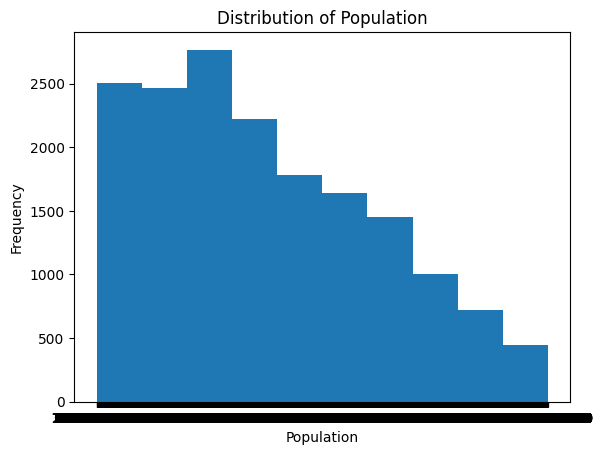

In [ ]:
# Create a pandas dataframe from the Spark DataFrame
pandas_df = spark.sql("SELECT population FROM housing").toPandas()

# Plot the data using matplotlib
import matplotlib.pyplot as plt

plt.hist(pandas_df['population'], bins=10)
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.title('Distribution of Population')
plt.show()

In [ ]:
df_predictions = spark.read.csv('/content/sample_data/california_housing_train.csv', header=True)
df_predictions.show()

+-----------+---------+------------------+-----------+--------------+-----------+-----------+-------------+------------------+
|  longitude| latitude|housing_median_age|total_rooms|total_bedrooms| population| households|median_income|median_house_value|
+-----------+---------+------------------+-----------+--------------+-----------+-----------+-------------+------------------+
|-114.310000|34.190000|         15.000000|5612.000000|   1283.000000|1015.000000| 472.000000|     1.493600|      66900.000000|
|-114.470000|34.400000|         19.000000|7650.000000|   1901.000000|1129.000000| 463.000000|     1.820000|      80100.000000|
|-114.560000|33.690000|         17.000000| 720.000000|    174.000000| 333.000000| 117.000000|     1.650900|      85700.000000|
|-114.570000|33.640000|         14.000000|1501.000000|    337.000000| 515.000000| 226.000000|     3.191700|      73400.000000|
|-114.570000|33.570000|         20.000000|1454.000000|    326.000000| 624.000000| 262.000000|     1.925000|    

Machine Learning

In [ ]:
from pyspark.ml.classification import LogisticRegression

# Load training data
training = spark.read.format("libsvm").load("data/mllib/sample_libsvm_data.txt")

lr = LogisticRegression(maxIter=10, regParam=0.3, elasticNetParam=0.8)

# Fit the model
lrModel = lr.fit(training)

# Print the coefficients and intercept for logistic regression
print("Coefficients: " + str(lrModel.coefficients))
print("Intercept: " + str(lrModel.intercept))

# We can also use the multinomial family for binary classific

AnalysisException: [PATH_NOT_FOUND] Path does not exist: file:/content/data/mllib/sample_libsvm_data.txt.

In [ ]:
# importing ML library
from pyspark.ml.classification import LogisticRegression

# select our data columns
import pyspark.sql.functions as f

data = df.select(f.col('housing_median_age').cast('float').alias('f1'),
          f.col('total_rooms').cast('float').alias('f2'),
          f.col('median_house_value').cast('float').alias('label'))


In [ ]:

# importing ML library
from pyspark.ml.classification import LogisticRegression

# select our data columns
import pyspark.sql.functions as f

data = df.select(f.col('housing_median_age').cast('float').alias('f1'),
          f.col('total_rooms').cast('float').alias('f2'),
          f.col('median_house_value').cast('float').alias('label'))

# create a features vector
from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(inputCols=['f1', 'f2'], outputCol='features')

In [ ]:

from pyspark.ml.classification import LogisticRegression

# Extract the summary from the returned LogisticRegressionModel instance trained
# in the earlier example

trainingSummary = lrModel.summary

# Obtain the objective per iteration
objectiveHistory = trainingSummary.objectiveHistory
print("objectiveHistory:")
for objective in objectiveHistory:
    print(objective)

# Obtain the receiver-operating characteristic as a dataframe and areaUnderROC.
trainingSummary.roc.show()
print("areaUnderROC: " + str(trainingSummary.areaUnderROC))

# Set the model threshold to maximize F-Measure
fMeasure = trainingSummary.fMeasureByThreshold
maxFMeasure = fMeasure.groupBy().max('F-Measure').select('max(F-Measure)').head()
bestThreshold = fMeasure.where(fMeasure['F-Measure'] == maxFMeasure['max(F-Measure)']) \
    .select('threshold').head()['threshold']

lr.setThreshold(bestThreshold)

NameError: name 'lrModel' is not defined

In [ ]:
# importing ML library
from pyspark.ml.classification import LogisticRegression

# select our data columns
import pyspark.sql.functions as f

data = df.select(f.col('housing_median_age').cast('float').alias('f1'),
          f.col('total_rooms').cast('float').alias('f2'),
          f.col('median_house_value').cast('float').alias('label'))

# create a features vector
from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(inputCols=['f1', 'f2'], outputCol='features')
training

NameError: name 'training' is not defined